<a href="https://colab.research.google.com/github/harshitshakya123/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Breast Cancer Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

import os
import cv2
from PIL import Image
import numpy as np

In [3]:
# Segmentation code

import numpy as np
import cv2
import matplotlib.pyplot as plt

def segement_images(image_8):
  image_hsv = cv2.cvtColor(image_8, cv2.COLOR_BGR2HSV)   #Converting image to hsv format(hue, saturation and value)

  #Defining range of black values in hsv format
  lower_black = np.array([0, 0, 200]) 
  upper_black = np.array([100,105, 255]) 

  #Create a mask instance for the image using inRange attribute
  mask = cv2.inRange(image_hsv, lower_black, upper_black)

  #Applying the msk over image using bitwise_and
  image_bgr_masked = cv2.bitwise_and(image_8, image_8, mask= mask)

  #Conversion of image into RGB format
  image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

  return image_rgb

In [5]:
#Check image size
import cv2

image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/malignant_cases/malign1.png')
print(image.shape)

(1024, 1024, 3)


(1024, 1024, 3)


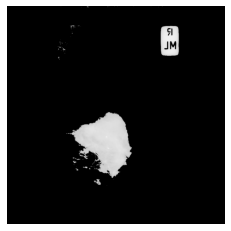

In [ ]:
#Check my segment code is properly work or not 
import cv2

image_8 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/malignant_cases/malign0.png')
print(image_8.shape)
image_rgb=segement_images(image_8)
#Showing image using imshow() using matplotlib
plt.imshow(image_rgb, cmap = 'gray'), plt.axis('off')
plt.show()

In [ ]:
# Categories images
import os
import cv2
import pandas as pd

KEY_LABEL = 3
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/data_description.csv", header=None, index_col=0)
df[KEY_LABEL].fillna('N', inplace=True)  # Empty values correspond to normal cases ('M'=malignant, 'B'=benign).
df[3].str.strip()  # Strip leading and trailing spaces in label column.

for img_pgm in os.listdir("/content/drive/MyDrive/Colab Notebooks/dataset/all-mias"):
    if img_pgm.endswith(".pgm"):
        img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dataset/all-mias/{}".format(img_pgm))
        img_name = img_pgm.split(".")[0]
        label = df.loc[img_name].loc[3]
        if label == 'N':
            new_path = "/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/benign_cases/{}.png".format(img_name)
        elif label == 'B ':
            new_path = "/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/benign_cases/{}.png".format(img_name)
        cv2.imwrite(new_path, img)
        print("Converted {} from PGM to PNG ({} case).".format(img_pgm, label))
print("Finished converting and sorting dataset.")    

In [ ]:

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
import array

# Identify malignant images
image_directory = '/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/all-mias/'
arr =  ['mdb002.pgm','mdb004.pgm','mdb003.pgm','mdb001.pgm','mdb013.pgm','mdb014.pgm','mdb004.pgm','mdb023.pgm','mdb039.pgm','mdb037.pgm','mdb004.pgm','mdb028.pgm','mdb029.pgm','mdb030.pgm',
'mdb050.pgm','mdb049.pgm','mdb054.pgm','mdb053.pgm','mdb068.pgm','mdb065.pgm','mdb067.pgm','mdb081.pgm','mdb004.pgm','mdb089.pgm','mdb090.pgm','mdb115.pgm','mdb106.pgm','mdb105.pgm','mdb108.pgm'
,'mdb004.pgm','mdb110.pgm','mdb111.pgm','mdb112.pgm','mdb107.pgm','mdb109.pgm','mdb116.pgm','mdb121.pgm','mdb122.pgm','mdb125.pgm','mdb126.pgm','mdb124.pgm'
,'mdb130.pgm'
,'mdb138.pgm'
,'mdb137.pgm'
,'mdb152.pgm'
,'mdb163.pgm'
,'mdb164.pgm'
,'mdb162.pgm'
,'mdb171.pgm'
,'mdb179.pgm'
,'mdb178.pgm'
,'mdb180.pgm'
,'mdb172.pgm'
,'mdb189.pgm'
,'mdb184.pgm'
,'mdb191.pgm'
,'mdb197.pgm'
,'mdb194.pgm'
,'mdb193.pgm'
,'mdb207.pgm'
,'mdb208.pgm'
,'mdb211.pgm'
,'mdb221.pgm'
,'mdb218.pgm'
,'mdb217.pgm'
,'mdb212.pgm'
,'mdb222.pgm'
,'mdb215.pgm'
,'mdb216.pgm'
,'mdb226.pgm'
,'mdb239.pgm'
,'mdb244.pgm'
,'mdb236.pgm'
,'mdb243.pgm'
,'mdb241.pgm'
,'mdb240.pgm'
,'mdb249.pgm'
,'mdb254.pgm'
,'mdb253.pgm'
,'mdb257.pgm'
,'mdb258.pgm'
,'mdb265.pgm'
,'mdb259.pgm'
,'mdb260.pgm'
,'mdb262.pgm'
,'mdb271.pgm'
,'mdb282.pgm'
,'mdb281.pgm'
,'mdb279.pgm'
,'mdb285.pgm'
,'mdb283.pgm'
,'mdb292.pgm'
,'mdb290.pgm'
,'mdb289.pgm'
,'mdb295.pgm'
,'mdb291.pgm'
,'mdb287.pgm'
,'mdb268.pgm'
,'mdb296.pgm'
,'mdb311.pgm'
,'mdb317.pgm'
,'mdb321.pgm'
,'mdb316.pgm'
,'mdb322.pgm'
,'mdb318.pgm'
,'mdb319.pgm'
,'mdb320.pgm'
,'mdb315.pgm']

for i, image_name in enumerate(arr):
  print(image_name) 
  image = cv2.imread(image_directory + image_name)
  seg=segement_images(image)
  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/malignant_cases/malign"+str(i)+".png", seg)  
  

In [6]:
image_directory = '/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/'
SIZE = 256
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all infected images and 1 to uninfected images.



In [8]:
#Iterate through all images in benign_cases folder, resize to 256 x 256
#Then save into the same numpy array 'dataset' but with label 0
uninfected_images = os.listdir(image_directory + 'benign_cases/')
for i, image_name in enumerate(uninfected_images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'benign_cases/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#Iterate through all images in Malignat_cases folder, resize to 256 x 256
#Then save into the same numpy array 'dataset' but with label 1

infected_images = os.listdir(image_directory + 'malignant_cases/')
for i, image_name in enumerate(infected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'malignant_cases/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

dataset = np.array(dataset)
label = np.array(label)

In [9]:
print(dataset.shape)
print(label.shape)

(479, 256, 256, 3)
(479,)


Label for this image is:  1


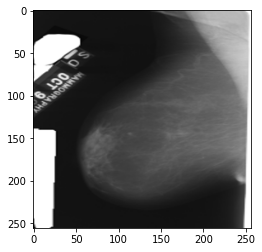

In [11]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow((dataset[image_number]))
print("Label for this image is: ", label[image_number])

In [12]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [13]:
#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)
X_train = X_train / 255.
X_test = X_test / 255. 

In [14]:
#Define our model
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  

#Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/dataset/breastCancer.h5')

#Do not use softmax for binary classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#But, also good for binary mutually exclusive (cat or not cat). 

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [16]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 30,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/30
6/6 [==============================] - 50s 728ms/step - loss: 1.4065 - accuracy: 0.5794 - val_loss: 0.1510 - val_accuracy: 0.9896
Epoch 2/30
6/6 [==============================] - 1s 191ms/step - loss: 0.0333 - accuracy: 0.9917 - val_loss: 0.1860 - val_accuracy: 0.9896
Epoch 3/30
6/6 [==============================] - 1s 186ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2236 - val_accuracy: 0.9896
Epoch 4/30
6/6 [==============================] - 1s 194ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2584 - val_accuracy: 0.9896
Epoch 5/30
6/6 [==============================] - 1s 191ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2978 - val_accuracy: 0.9896
Epoch 6/30
6/6 [==============================] - 1s 185ms/step - loss: 7.4194e-04 - accuracy: 1.0000 - val_loss: 0.3369 - val_accuracy: 0.9896
Epoch 7/30
6/6 [==============================] - 1s 190ms/step - loss: 4.3375e-04 - accuracy: 1.0000 - val_loss: 0.3124 - val_accuracy: 0.9896
Epoch 8/30


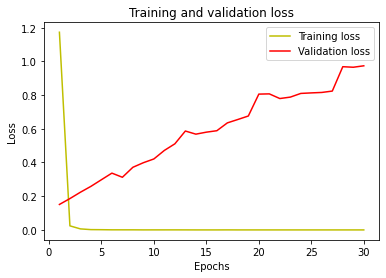

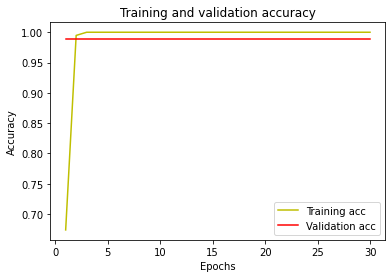

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The prediction for this image is:  [[1.]]
The actual label for this image is:  1
Benign


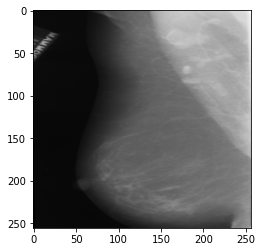

In [ ]:
#Test the model on single images 
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])
if y_test[n] == 1:
  print('Benign')
else:
  print('Malignant')  


0
The image classified is malign


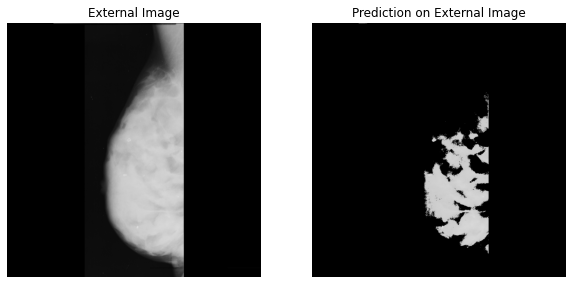

In [18]:
# Check External Images
import numpy as np
from tensorflow.keras.preprocessing import image

#Benign directory
# image_directory='/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/benign_cases/benign100.png'

#malignant directory
image_directory='/content/drive/MyDrive/Colab Notebooks/dataset/mini-MIAS/data/malignant_cases/malign100.png'
test=cv2.imread(image_directory)
test_image = image.load_img(image_directory, target_size = (256,256))
test_image = image.img_to_array(test_image)
#test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = (model.predict(test_image))

seg=segement_images(test)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8),
                                    sharex=True, sharey=True)
ax1.imshow(test, cmap='gray')
ax1.axis('off')
ax1.set_title('External Image')
ax2.imshow(seg, cmap='gray')
ax2.axis('off')
ax2.set_title('Prediction on External Image')
 
print(int(result[0][0]))
if int(result[0][0]) == 0:
    print("The image classified is malign")
else:
    print("The image classified is benign")

In [ ]:
#for accuracy
################################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

3/3 [==============================] - 0s 20ms/step - loss: 0.8847 - accuracy: 0.9896
Accuracy =  98.95833134651184 %


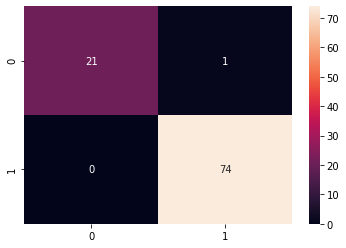

In [ ]:
#How do we know how it is doing for parasitized vs uninfected? 
################################################################

#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=1
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True)

#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative. 

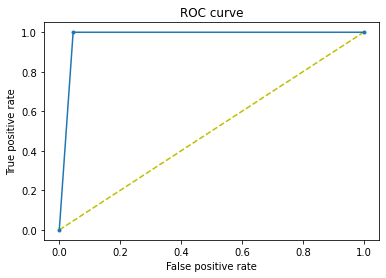

In [ ]:
#ROC can help identify the right threshold.
#Refer to video 106 for explanation of ROC curves. 
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
"""
#One way to find the best threshold once we calculate the true positive 
and false positive rates is ...
The optimal cut off point would be where “true positive rate” is high 
and the “false positive rate” is low. 
Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)
"""
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 


Ideal threshold is:  1    1.0
Name: thresholds, dtype: float32
